## Подготовительные упражнения к проекту

In [4]:
import pandas as pd
import re
import datetime
import seaborn as sns

In [68]:
df0 = pd.read_csv('main_task.csv')
df = df0.copy()

In [69]:
# сколько вариантов непустых значений в столбце Price Range
b = df['Price Range'].value_counts()
len(b)

3

In [64]:
b

Price Range
$$ - $$$    18412
$            6279
$$$$         1423
Name: count, dtype: int64

In [7]:
# сколько средних значений
b['$$ - $$$']

18412

In [8]:
# сколько городов
len(df['City'].value_counts())

31

In [78]:
# сколько типов кухонь -- разбить и посчитать
df1 = df.loc[:, ['Restaurant_id', 'Cuisine Style']]
df1 = df1.dropna()
df1['Cuisine Style'] = df1['Cuisine Style'].apply(lambda x: x[1:-1].replace("'", '').split(', ')) # убираем передние и задние кавычки/ убираем кавычки у каждого слова/ делаем список из значений
cuisine = df1['Cuisine Style'].explode().unique() # разбиваем по кухням/ делаем список из уникальных значений
len(cuisine) # считаем количество разных кухонь

125

In [82]:
# какая кухня наиболее часто встречается
print(df1['Cuisine Style'].explode().mode()[0])

Vegetarian Friendly


In [89]:
# среднее количество кухонь на 1 ресторан. Если NaN, то 1. Округлить до 1
df2 = df.loc[:, ['Restaurant_id', 'Cuisine Style']] # выбираем 2 колонки - рестораны и кухни
df2.loc[:, 'Cuisine Style'].fillna('1', inplace = True) # заменяем отсутствующие значения любой строкой 
# убираем передние и задние кавычки/ убираем кавычки у каждого слова/ делаем список из значений/ считаем количество кухонь в ресторане
df2['Cuisine Style'] = df2.loc[:, 'Cuisine Style'].apply(lambda x: len(x[1:-1].replace("'", '').split(', ')))
round(df2['Cuisine Style'].mean(), 1) # считаем среднее значение количества кухонь по столбцу/ округляем до 1

2.6

In [106]:
# самый ранний отзыв
df3 = df.loc[:, 'Reviews'] # выбираем столбец с отзывами
df3 = df3.apply(lambda x: re.findall(r'\d{2}/\d{2}/\d{4}', x)) # выбираем даты отзывов
df3 = df3[df3.astype(bool)] # убираем пустые списки
df3 = df3.apply(lambda x: x[0]) # выбираем первую дату
df3 = pd.to_datetime(df3, format="%m/%d/%Y") # переводим данные столбца в формат даты
print(df3.max().date()) # находим последнюю дату

2018-02-26


In [113]:
# макс. количество дней между отзывами
df4 = df.loc[:, ['Restaurant_id', 'Reviews']] # выбираем столбец с отзывами
df4['Reviews'] = df4.loc[:, 'Reviews'].map(lambda x: re.findall(r'\d{2}/\d{2}/\d{4}', x)) # выбираем даты отзывов
df4 = df4[df4['Reviews'].apply(len) > 0] # удаляем пустые списки
df4['a'] = df4['Reviews'].apply(lambda x: x[0]) # создаём столбец с последней датой
df4['b'] = df4['Reviews'].apply(lambda x: x[-1]) # создаём столбец с предпоследней датой
df4['a'] = pd.to_datetime(df4['a'], format="%m/%d/%Y") # переводим данные столбца a в формат даты
df4['b'] = pd.to_datetime(df4['b'], format="%m/%d/%Y") # переводим данные столбца b в формат даты
df4['c'] = df4.a - df4.b # создаём столбец с разницей между отзывами
print(df4['c'].max()) # находим максимальной разницей

3207 days 00:00:00


## Содержание фрейма

**Restaurant_id** - идентификационный номер ресторана / сети ресторанов  
**City** - город, в котором находится ресторан  
**Cuisine Style** - кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане  
**Ranking** - место, которое занимает данный ресторан среди всех ресторанов своего города  
**Rating** - рейтинг ресторана по данным TripAdvisor (именно это значение должна была предсказывать модель)  
**Price Range** - диапазон цен в ресторане  
**Number of Reviews** - количетво отзывов в ресторане  
**Reviews** - данные о двух отзывах, которые отображаются на сайте ресторана  
**URL_TA** - URL страницы ресторана на TripAdvisor  
**ID_TA** - идентификатор ресторана в базе данных TripAdvisor

## Загрузка Pandas и очистка данных

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [15]:
# количество пропущенных значений в каждом столбце
df.isnull().sum()

Restaurant_id            0
City                     0
Cuisine Style         9283
Ranking                  0
Rating                   0
Price Range          13886
Number of Reviews     2543
Reviews                  0
URL_TA                   0
ID_TA                    0
dtype: int64

Axes(0.125,0.11;0.62x0.77)


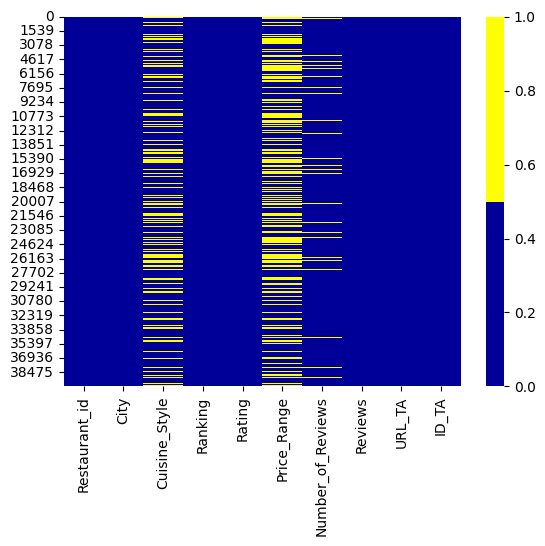

In [21]:
#тепловая карта пропущеннных значений
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
print(sns.heatmap(df.isnull(), cmap=sns.color_palette(colours)))

В целевой переменной Rating нет пропущенных значений, поэтому предобработка выполняется только в переименовании названий столбцов для удобства.

Заменим в названиях колонок пробелы подчёркиванием.

In [25]:
df.columns = df.columns.str.replace(" ", "_")

In [29]:
df.head()

,Restaurant_id,City,Cuisine_Style,Ranking,Rating,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


## Напишем функции для обработки данных

In [58]:
# составим функцию для вывода начальных данных
def test(df, colx):
    # где df - фрейм данных, colx - название анализируемой колонки
    dfx = df[colx]
    a1 = pd.DataFrame(dfx.value_counts()) # создание таблицы с данными по столбцу
    a1['percent'] = round((a1 * 100 / len(df)), 5) # создание таблицы с процентным соотношением данных по столбцу
    b1 = round(abs(len(df) - a1['count'].sum()), 2) # вычисляем количество незаполненных данных
    c1 = round(abs(100 - a1.percent.sum()), 2) # вычисляем процент незаполненных данных
    print(a1), print(f'Количество незаполненных значений: {b1} ~ {c1}%.'), df.loc[:, [colx]].info()
    if dfx.dtypes != 'O': # если столбец числовой, строим гистограмму распределения
        dfx.hist()
# составим функцию для обработки данных
def objekt(df, colx): # функция для замены отсутствующих значений на наиболее часто встречающиеся или,
    # при небольшой разнице в количестве значений, на любое из двух наиболее часто встречающихся.
    # где df - фрейм данных, colx - название анализируемой колонки
    dfx = df[colx]
    a = pd.DataFrame(dfx.value_counts())
    a['percent'] = round((a[colx] * 100 / len(df)), 2)
    u = a.percent.values[0] - a.percent.values[1]
    u1 = [a.index[0], a.index[1]]
    if dfx.dtypes == 'O' and u > 15:
    # заполнение строковых столбцов: когда строковые столбцы имеют пропущенные значения и значения NaN
        dfx.fillna(dfx.mode().values[0], inplace = True)
    elif dfx.dtypes == 'O' and u <= 15:
        dfx.fillna(random.choice(u1), inplace = True)
    # заполнение числовых столбцов: когда числовые столбцы имеют пропущенные значения и значения NaN
    elif dfx.dtypes != 'O' and u > 15:
        dfx.fillna(dfx.value_counts().index[0], inplace = True)
    else:
        dfx.fillna(random.choice(u1), inplace = True)
    b = pd.DataFrame(dfx.value_counts()) # создание таблицы с данными по столбцу
    b['percent'] = round((b[colx] * 100 / len(df)), 2) # создание таблицы с процентным соотношением данных по столбцу
    return b
def get_boxplot(df, colx, coly, n): # построение графиков сравнения
    # где df - фрейм данных, colx - название анализируемой колонки, coly - название колонки для сравнения, n - выборка
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x = colx, y = coly,
            data = df.loc[df.loc[:, colx].isin(df.loc[:, colx].value_counts().index[:n])],
            ax = ax)
    plt.xticks(rotation = 45)
    ax.set_title('Boxplot for ' + colx)
    plt.show()

## Рассмотрим подробнее каждый столбец

### Restaurant_id - идентификационный номер ресторана / сети ресторанов

In [56]:
a1 = pd.DataFrame(df['Rating'].value_counts())
a1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 4.0 to 1.5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9 non-null      int64
dtypes: int64(1)
memory usage: 144.0 bytes


In [59]:
test(df, 'Restaurant_id')

               count  percent
Restaurant_id                
id_633            18   0.0450
id_436            18   0.0450
id_227            18   0.0450
id_871            18   0.0450
id_430            17   0.0425
...              ...      ...
id_8716            1   0.0025
id_14532           1   0.0025
id_9738            1   0.0025
id_11559           1   0.0025
id_6057            1   0.0025

[11909 rows x 2 columns]
Количество незаполненных значений: 0 ~ 0.0%.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant_id  40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


Пропущенных значений нет. Есть преобладающие значения, но это, возможно, рестораны одной сети.

Добавим колонку, где обозначим сетевые рестораны как 1, а встречающиеся 1 раз, как 0.

In [61]:
a1 = df.Restaurant_id.value_counts() # составим список данных по столбцу
Net_rest = a1[a1 > 1].index.tolist() # составим список значений > 1
df['Net_rest'] = df[df.Restaurant_id.isin(Net_rest)].Restaurant_id.apply(lambda x: 1) # создадим колонку со значениями 1 на месте сетевых ресторанов
df.Net_rest = df['Net_rest'].fillna(0) # в созданной колонке пустые значения заменим на 0

#### Проверим данные

          count  percent
Net_rest                
1.0       35295  88.2375
0.0        4705  11.7625
Количество незаполненных значений: 0 ~ 0.0%.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Net_rest  40000 non-null  float64
dtypes: float64(1)
memory usage: 312.6 KB


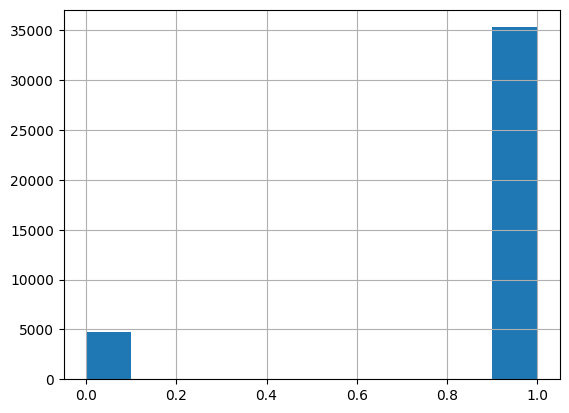

In [62]:
test(df, 'Net_rest')

Отметим, что сетевых ресторанов большинство (> 88%).

### City - город, в котором находится ресторан

In [ ]:
test(df, 'City')

Все значения заполнены. Пропусков нет. Грамматических ошибок и неточностей в названиях городов нет.

Сделаем из этой колонки dummy- переменные.

In [ ]:
df['City_new'] = df['City'] # создадим копию колонки для разбивки
df = pd.get_dummies(df, columns = ['City_new', ], drop_first = False) # разобъём новую колонку на dummy переменные

In [ ]:
df.columns

### Cuisine Style - кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане

In [ ]:
test(df, 'Cuisine_Style')

Данные заполнены строками. Пропусков 23%. Для разбивки строки данных на списки, необходимо заполнить строки без значений.  
Для этого необходима обработка остальных столбцов, так что пока отложим работу с данными этого столбца.

Найдём наиболее часто встречающийся тип кухонь для замены отсутствующих значений

In [ ]:
df0 = pd.read_csv('main_task.csv')
df = df0.copy()
df.columns = df.columns.str.replace(" ", "_")
a1 = df.Restaurant_id.value_counts() # составим список данных по столбцу
Net_rest = a1[a1 > 1].index.tolist() # составим список значений > 1
df['Net_rest'] = df[df.Restaurant_id.isin(Net_rest)].Restaurant_id.apply(lambda x: 1) # создадим колонку со значениями 1 на месте сетевых ресторанов
df.Net_rest = df['Net_rest'].fillna(0) # в созданной колонке пустые значения заменим на 0

In [ ]:
df1 = df.loc[:, ['Restaurant_id', 'Cuisine_Style', 'Net_rest', 'City']]

#df1['Cuisine_Style'] = df1['Cuisine_Style'].fillna("['No_Style']") # заменяем отсутствующие значения на число для упрощения сортировки
#df1['Cuisine_Style'] = df1['Cuisine_Style'].apply(lambda x: x[1:-1].replace("'", '').split(', ')) # убираем передние и задние кавычки/ убираем кавычки и пробелы у каждого слова/ делаем список из значений
df1.head(5)

In [ ]:
df1['Cuisine_Style'].value_counts()

In [ ]:
df1['City'].value_counts()

In [ ]:
#df2 = df1[df1['Cuisine_Style']==[No_Style]]

In [ ]:
#df2

In [ ]:
#df2['Net_rest'].value_counts()

In [ ]:
def sort_max(df, colx, coly, colz): # создадим функцию, что создаёт столбец со значениями наиболее часто встречающихся для этого города типов ресторанов
    # где df - фрейм данных, colx - название анализируемой колонки, coly - название колонки сравнения, colz - название колонки с результатами сравнения
    df[colz] = df.groupby(colx)[coly].transform(lambda x: x.mode()[0])
    df[coly] = df[coly].fillna("['No_Style']")
    return df
sort_max(df1, 'City', 'Cuisine_Style', 'Temp')

In [ ]:
df2 = df1[df1['Cuisine_Style']==No_Style]

In [ ]:
df1['Net_rest'].value_counts()

### Ranking - место, которое занимает данный ресторан среди всех ресторанов своего города

In [ ]:
test(df, 'Ranking')

Все данные заполнены, пропусков нет. Данные представлены большими числами. Для работы модели необходимо нормализовать значения.

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import QuantileTransformer # импортируем библиотеку со способом нормализации

scaler = preprocessing.QuantileTransformer()
float_array = df['Ranking'].values.astype(float).reshape(-1 , 1) # создаём список из столбца
df['Ranking'] = scaler.fit_transform(float_array) # заменим данные в столбце на нормализованные

df.head() # проверим изменения

### Rating - рейтинг ресторана по данным TripAdvisor (именно это значение должна была предсказывать модель)

In [ ]:
test(df, 'Rating')

Пропусков нет. Данные введены корректно и без ошибок - значения распределены от 1 до 5 с шагом 0.5. Оставляем эти данные без изменений.

### Price Range - диапазон цен в ресторане

In [ ]:
test(df, 'Price_Range')

Пропусков достаточно много - почти 35%. Данные распределены без выбросов. Ошибок в данных нет.

Данные заменим на числовые, согласно величине диапазона.

In [ ]:
price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3} # создадим словарь для преобразования значений уровня цен
df['Price_Range'].replace(price_dict, inplace=True) # заменим значения в колонке

Заполним пропущенные значения. Эти данные должны перекликаться с расположением ресторана (т.к. в более населённых городах цены выше)  
и принадлежностью ресторана к сети (т.к. в сетевых ресторанах цены устанавливаются по своим схемам).
Наиболее населённым считаем город с большим количеством ресторанов.

In [ ]:
test(df, 'Price_Range')

In [ ]:
# удалить столбцы, содержащие данные типа object
# заполнить пропущенные значения нулём или средним арифметическим
#df1 = df.drop([col for col in df.columns if df[col].dtype == 'O'],axis=1)
df1 = df.drop(df.select_dtypes(include=['object']), axis = 1)
df1 = df1.fillna(df1.mean())
df1.head()

In [ ]:
df1.info()

In [ ]:
df['City'].dtype

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [ ]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df1.drop('Rating', axis = 1)
y = df1['Rating']

In [ ]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [ ]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [ ]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [ ]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred), 4)*100, '%')

In [ ]:
df